In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';', quotechar = '"')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
import numpy as np
df.replace("unknown", np.nan, inplace=True)

In [8]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [9]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [10]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [11]:
df.shape

(45211, 17)

In [12]:
x = df.drop('y', axis = 1)
y = df['y'].map({'yes': 1, 'no': 0})

In [13]:
x = pd.get_dummies(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
clf = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', random_state = 42)

In [16]:
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [17]:
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Accuracy: 90.19130819418335


In [18]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[7810  142]
 [ 745  346]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7952
           1       0.71      0.32      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.81      0.65      0.69      9043
weighted avg       0.89      0.90      0.88      9043



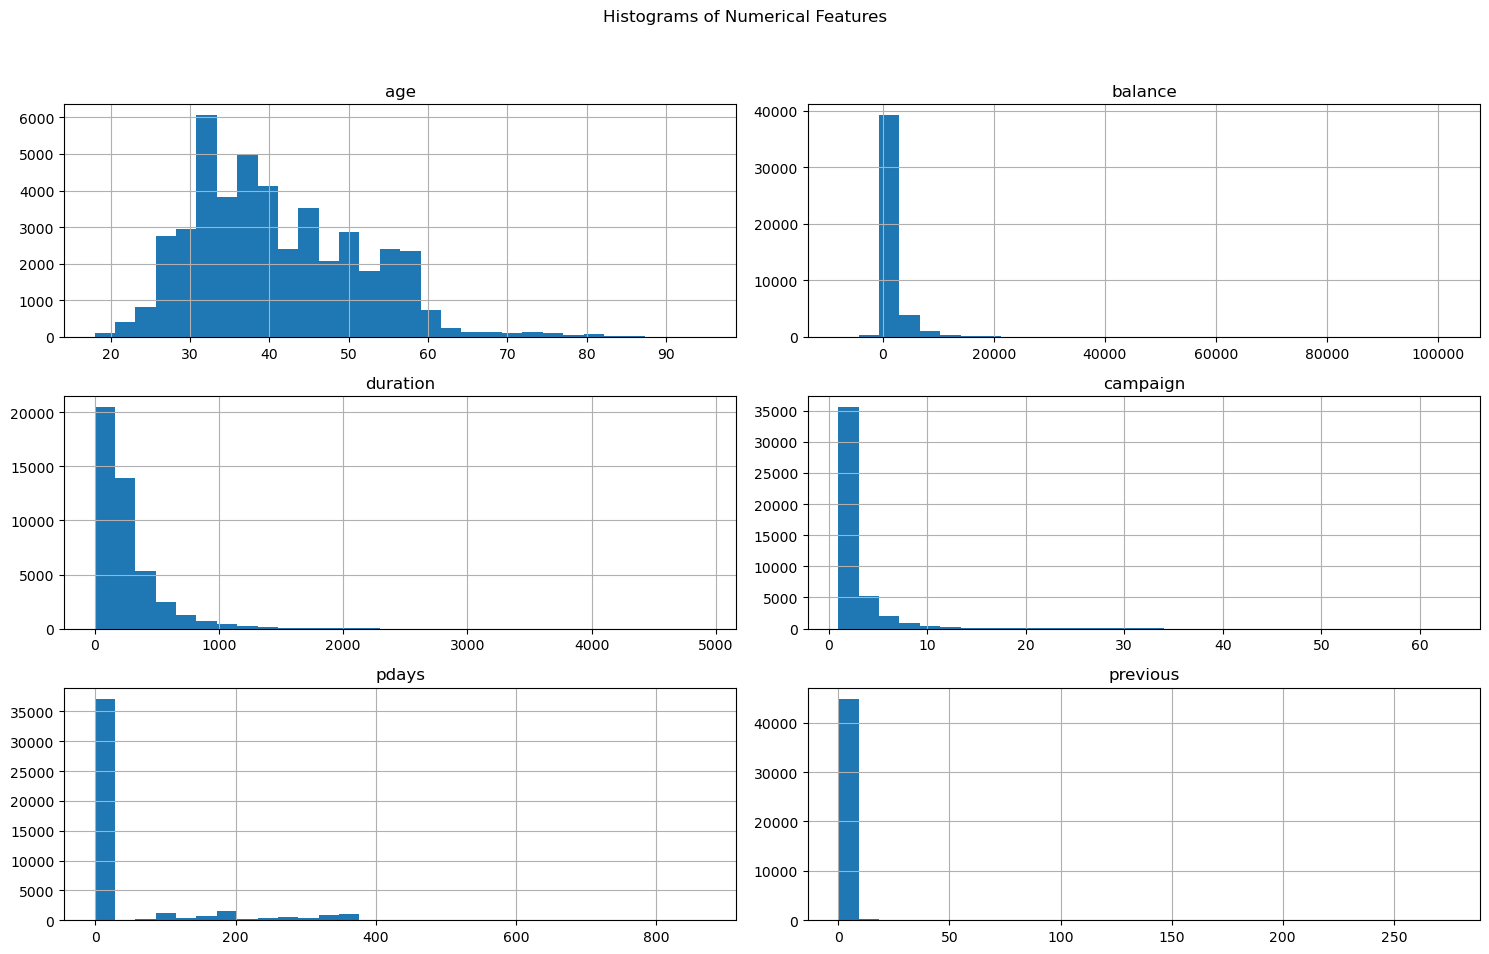

In [19]:
import matplotlib.pyplot as plt

numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

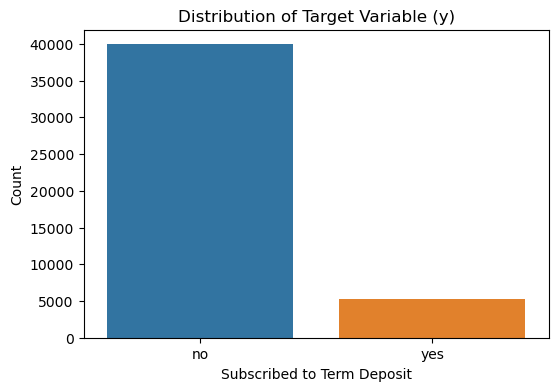

In [20]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

In [21]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']

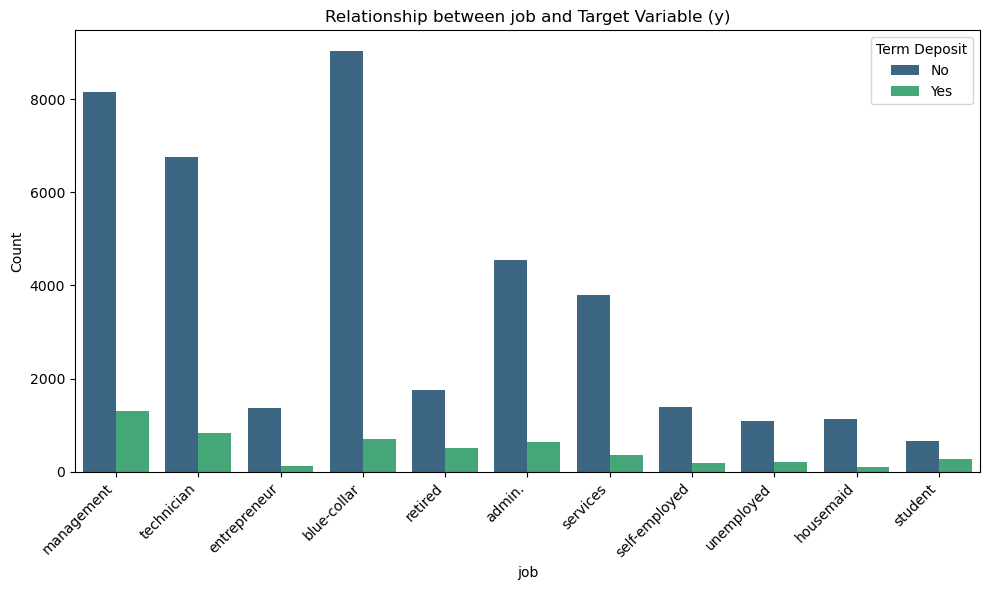

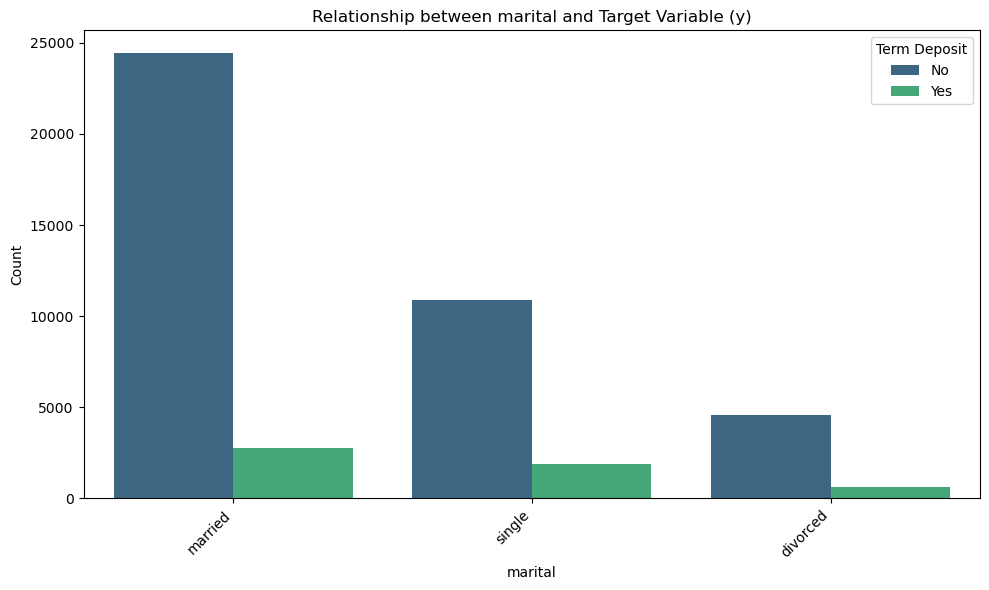

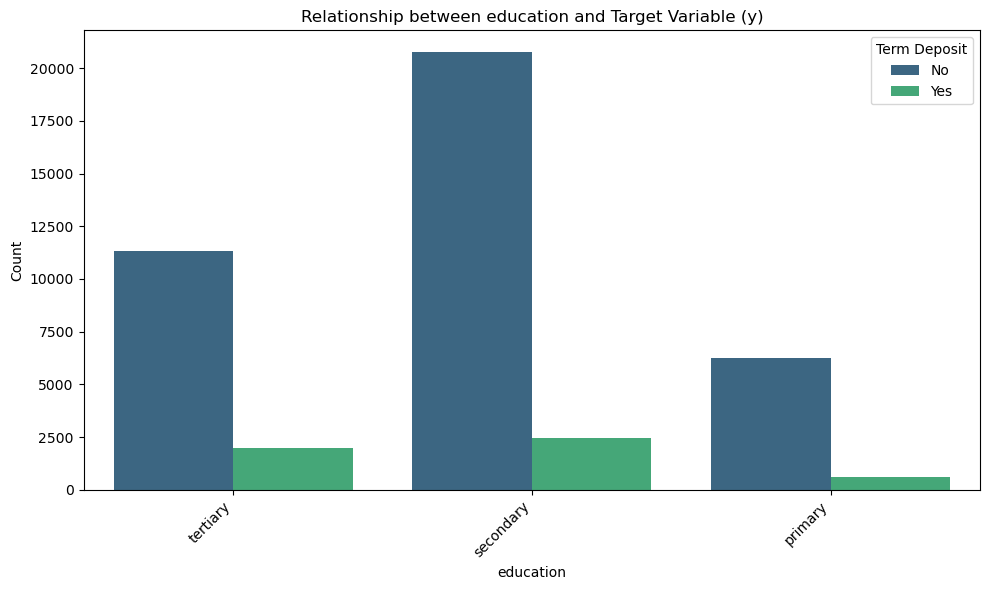

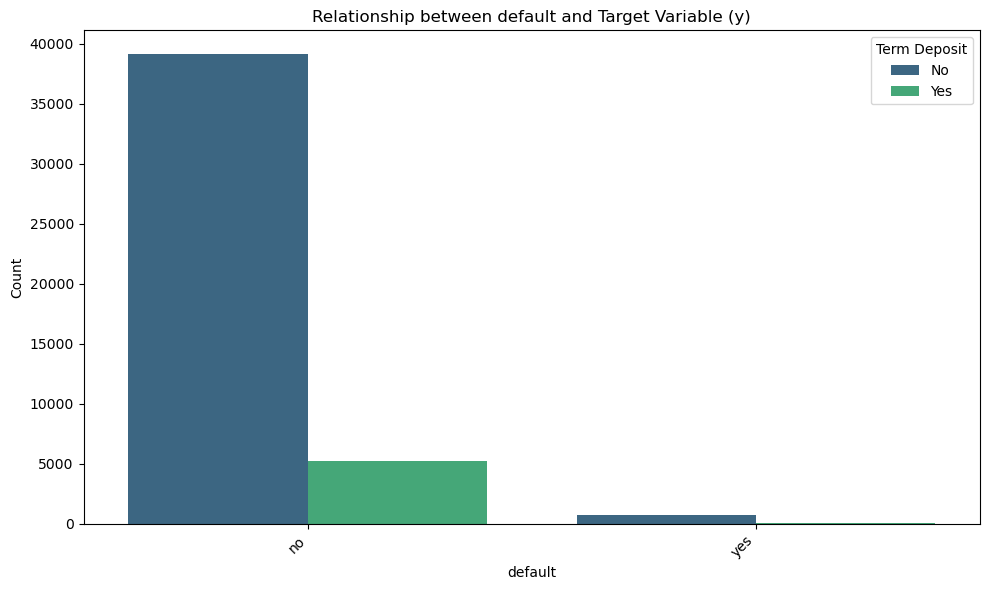

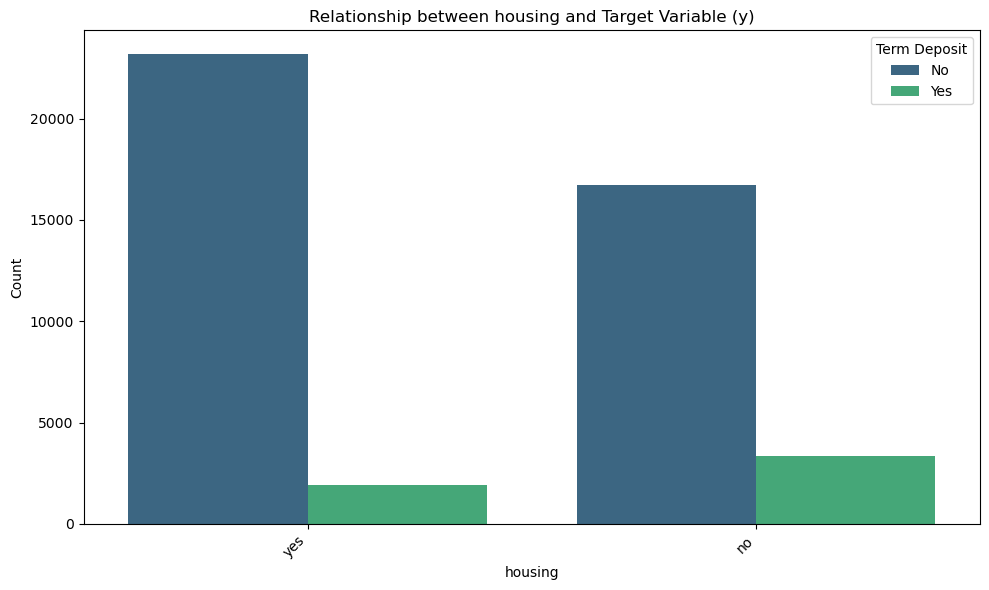

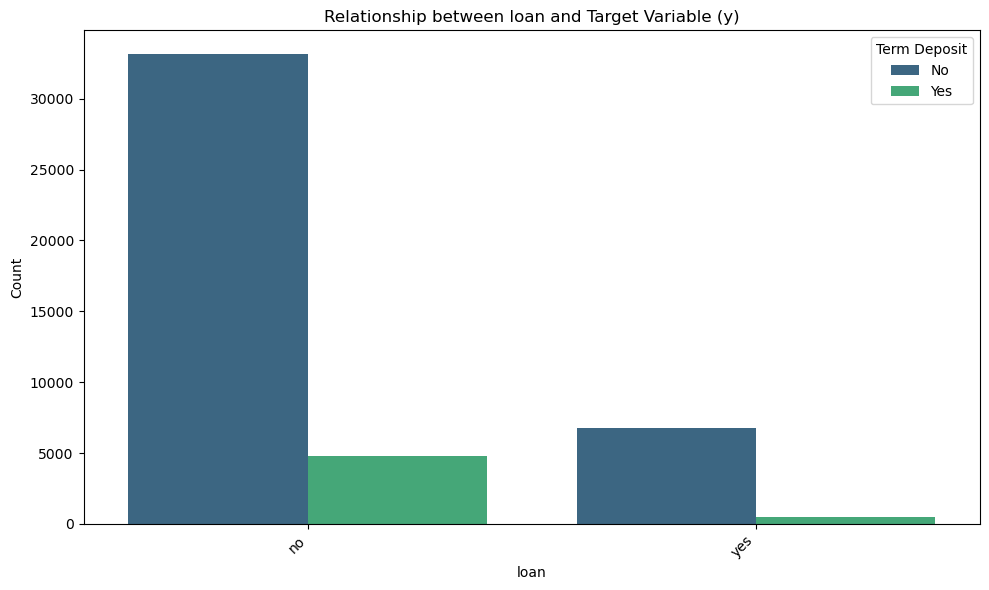

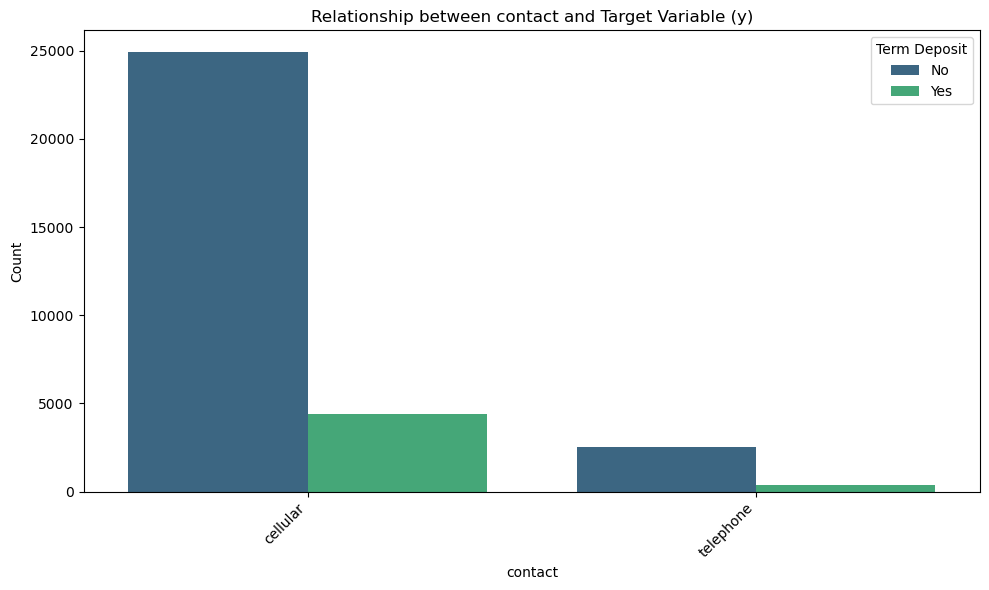

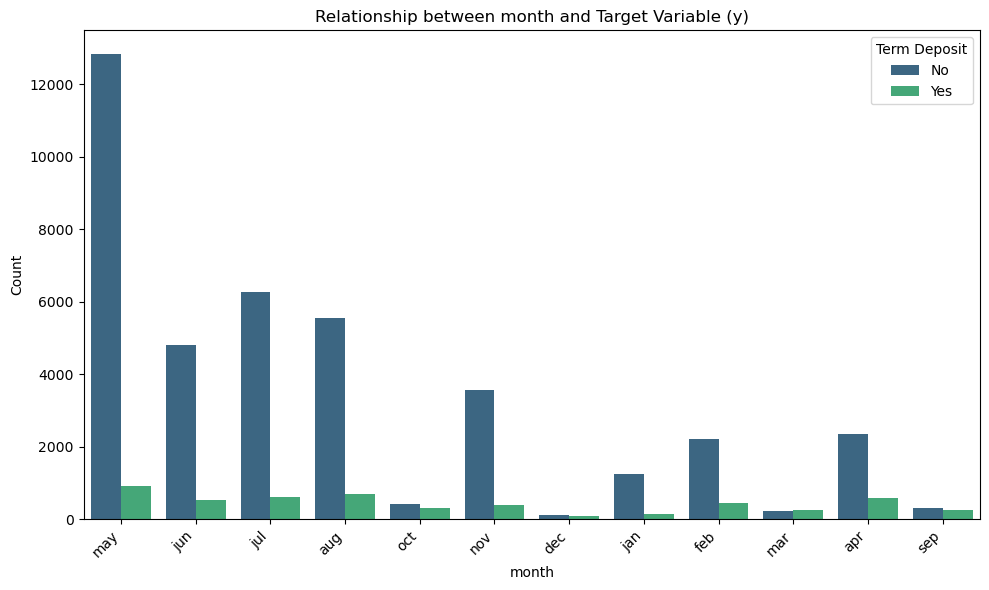

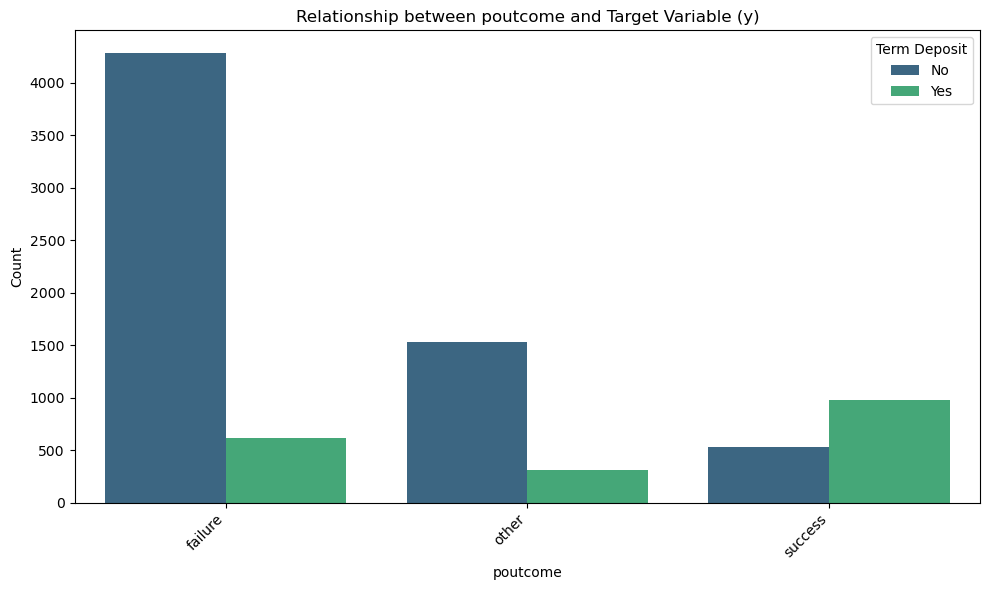

In [22]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='y', data=df, palette='viridis')
    plt.title(f'Relationship between {col} and Target Variable (y)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Term Deposit', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Pipeline with scaling + Logistic Regression
logreg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)
)

logreg_pipeline.fit(x_train, y_train)
y_pred_log = logreg_pipeline.predict(x_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7952
           1       0.42      0.83      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.84      0.73      9043
weighted avg       0.91      0.84      0.86      9043



In [25]:
y_pred = logreg_pipeline.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Accuracy: 84.26407165763574


In [27]:
import pandas as pd

# Count predicted churners ("yes") and non-churners ("no")
pd.Series(y_pred).value_counts()

0    6899
1    2144
Name: count, dtype: int64

In [28]:
# Actual distribution in test set
print("Actual distribution:")
print(pd.Series(y_test).value_counts())

# Predicted distribution
print("\nPredicted distribution by RFC:")
print(pd.Series(y_pred).value_counts())

Actual distribution:
y
0    7952
1    1091
Name: count, dtype: int64

Predicted distribution by RFC:
0    6899
1    2144
Name: count, dtype: int64
